# Tri Data OpenFoodFacts

## Installation & Import

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import re

In [4]:
import matplotlib.pyplot as plt

## Création du DataFrame de base

In [5]:
data = pd.read_csv("openfoodfacts.csv", sep="\t", low_memory=False)

In [6]:
# Le séparateur est "\t"

In [7]:
# Low_memory = False : explication

In [8]:
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Copie de la data de base

In [10]:
data_exo = data
data_exo 

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Les "Créators"

In [11]:
creator = data_exo['creator'].value_counts()
duplicated_creator = creator[creator>1]
duplicated_creator

creator
usda-ndb-import               169868
openfoodfacts-contributors     40117
kiliweb                        13891
date-limite-app                11918
openfood-ch-import             11478
                               ...  
neuro6                             2
luciehope                          2
manutrition                        2
ddespinoy                          2
paddy78                            2
Name: count, Length: 1898, dtype: int64

### Les "Products"

#### Product name ou generic name nul

In [12]:
# Nombre de lignes ayant les deux colonnes vides
product_null = data_exo[data_exo['product_name'].isnull() & data_exo['generic_name'].isnull()]
product_null.shape[1]

162

In [13]:
# Nombre de lignes ayant les 2 colonnes remplies
nb_lines = data_exo[data_exo['product_name'].notna() & data_exo['generic_name'].notna()]
nb_lines.shape[1]

162

In [14]:
data_exo.drop(product_null.index, inplace=True)

In [15]:
nb_lines = data_exo.shape[0]
print('Le nombre de lignes restant après suppression des produits sans nom est :', nb_lines)

Le nombre de lignes restant après suppression des produits sans nom est : 303129


### Les "Codes"

In [16]:
# Visualisation des codes "vide"

In [17]:
code_null = data_exo[data_exo['code'].isnull()]

In [18]:
code_null.shape[1]

162

In [19]:
data_exo.drop(code_null.index, inplace=True)

In [20]:
nb_lines = data_exo.shape[0]
print('Le nombre de lignes restant après suppression des codes nuls est :', nb_lines)

Le nombre de lignes restant après suppression des codes nuls est : 303106


### Les "Dates"

In [21]:
data_exo['last_modified_datetime'] = pd.to_datetime(data_exo['last_modified_datetime'])

In [22]:
data_exo['last_modified_datetime'] = data_exo['last_modified_datetime'].dt.date

In [23]:
data_exo['last_modified_datetime']

0         2016-09-17
1         2017-03-09
2         2017-03-09
3         2017-03-09
4         2017-03-09
             ...    
320767    2017-04-03
320768    2017-04-03
320769    2017-04-03
320770    2017-04-16
320771    2017-04-03
Name: last_modified_datetime, Length: 303106, dtype: object

In [24]:
# Compter le nombre de produits par date
date_counts = data_exo['last_modified_datetime'].value_counts().sort_index()

In [25]:
# Convertir les index en datetime pour le tracé
date_counts.index = pd.to_datetime(date_counts.index)

#### Création d'un diagramme pour voir les dates

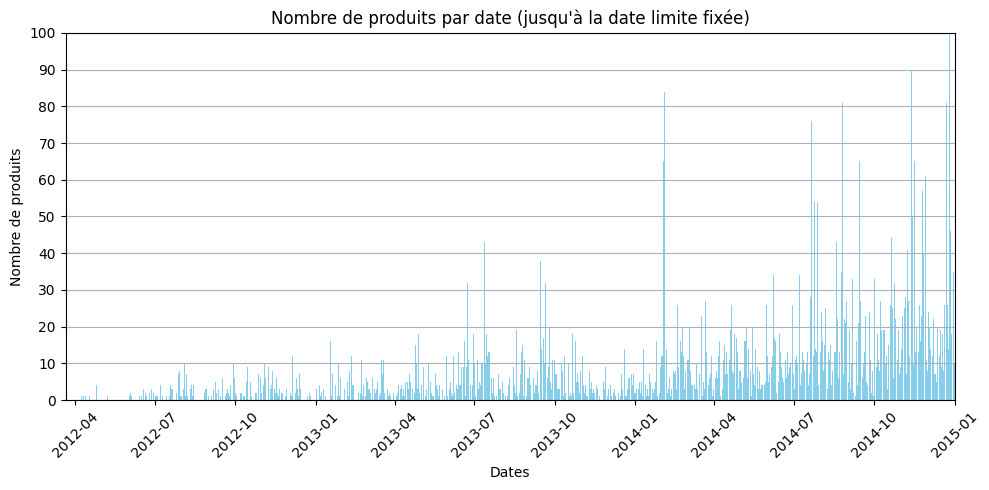

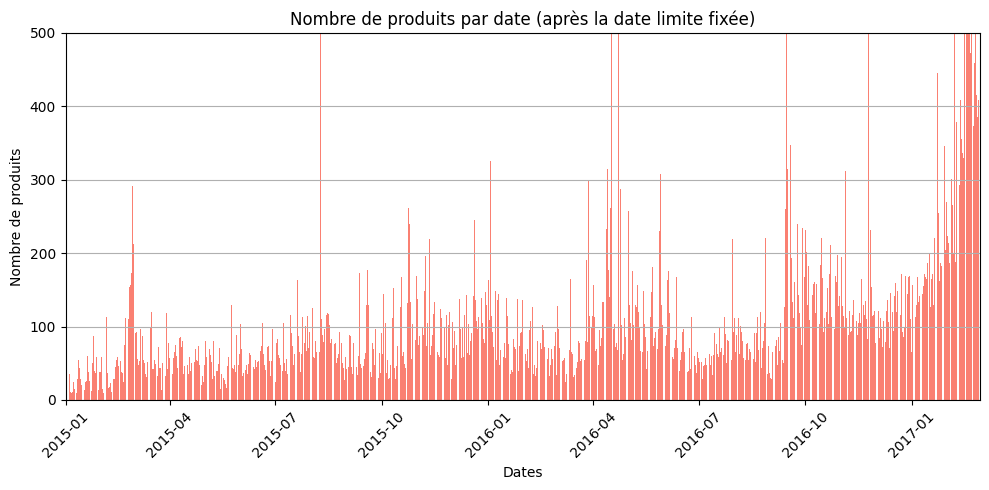

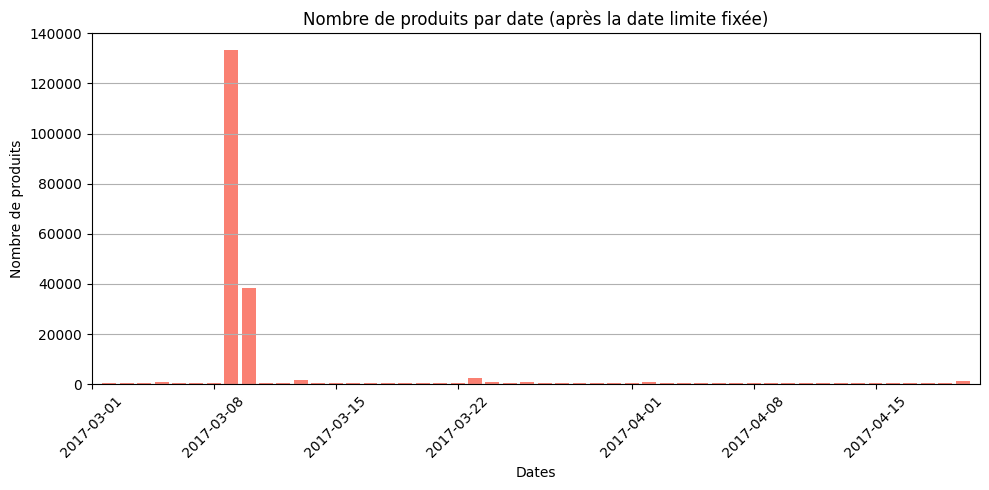

In [26]:

# Définir la date limite fixe
date_limit_1 = pd.to_datetime('2015-01-01')
# Définir la date limite fixe
date_limit_2 = pd.to_datetime('2017-03-01')

# Tracer le premier graphique (jusqu'à la date limite)
plt.figure(figsize=(10, 5))
plt.bar(date_counts.index[date_counts.index <= date_limit_1], date_counts.values[date_counts.index <= date_limit_1], color='skyblue')

# Fixer les limites de l'axe Y
max_y_value = 100 # Définir la valeur maximale de l'axe Y
plt.ylim(0, max_y_value)  # Appliquer la limite

# Ajuster les ticks de l'axe Y
plt.yticks(range(0, max_y_value + 10, 10))  # Définir l'intervalle des ticks de l'axe Y

# Définir les limites de l'axe X
plt.xlim(date_counts.index.min(), date_limit_1)

# Ajouter des labels et un titre
plt.xlabel('Dates')
plt.ylabel('Nombre de produits')
plt.title('Nombre de produits par date (jusqu\'à la date limite fixée)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tracer le deuxième graphique (après la date limite de 2015-01-01 jusqu'à 2017-01-01)
plt.figure(figsize=(10, 5))
plt.bar(date_counts.index[date_counts.index > date_limit_1], date_counts.values[date_counts.index > date_limit_1], color='salmon')

# Définir les limites de l'axe X
plt.xlim(date_limit_1, date_limit_2 )
# Fixer les limites de l'axe Y
max_y_value = 500 # Définir la valeur maximale de l'axe Y
plt.ylim(0, max_y_value)  # Appliquer la limite

# Ajuster les ticks de l'axe Y
plt.yticks(range(0, max_y_value + 100, 100))  # Définir l'intervalle des ticks de l'axe Y

# Ajouter des labels et un titre
plt.xlabel('Dates')
plt.ylabel('Nombre de produits')
plt.title('Nombre de produits par date (après la date limite fixée)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Tracer le troisième graphique (après la date limite de 2017-01-01)
plt.figure(figsize=(10, 5))
plt.bar(date_counts.index[date_counts.index > date_limit_2], date_counts.values[date_counts.index > date_limit_2], color='salmon')
# Définir les limites de l'axe X
plt.xlim(date_limit_2, date_counts.index.max())

# Ajouter des labels et un titre
plt.xlabel('Dates')
plt.ylabel('Nombre de produits')
plt.title('Nombre de produits par date (après la date limite fixée)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Calcul du nombres de produits entre chaque dates limites

In [27]:

# Convertir la colonne en type datetime
data_exo['last_modified_datetime'] = pd.to_datetime(data_exo['last_modified_datetime'])

# Extraire uniquement la date (sans heures, minutes et secondes)
data['date_only'] = data['last_modified_datetime'].dt.date

# Définir les limites de dates
date_limit_1 = pd.to_datetime('2015-01-01').date()
date_limit_2 = pd.to_datetime('2017-03-01').date()

# Compter le nombre de produits pour chaque plage de dates
nb_products_before_limit_1 = data_exo['date_only'][data_exo['date_only'] < date_limit_1].count()
nb_products_between_limits = data_exo['date_only'][(data_exo['date_only'] >= date_limit_1) & (data['date_only'] < date_limit_2)].count()
nb_products_after_limit_2 = data_exo['date_only'][data_exo['date_only'] >= date_limit_2].count()

# Afficher les résultats
print(f"Nombre de produits avant la date du 01/01/2015 : {nb_products_before_limit_1}")
print(f"Nombre de produits entre les dates du 01/01/2015 et 01/03/2017 : {nb_products_between_limits}")
print(f"Nombre de produits après la date du 01/03/2017 : {nb_products_after_limit_2}")

Nombre de produits avant la date du 01/01/2015 : 7540
Nombre de produits entre les dates du 01/01/2015 et 01/03/2017 : 94717
Nombre de produits après la date du 01/03/2017 : 200849


### Travail sur les "Products"

In [28]:
# Liste des colonnes :
data_exo.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

#### Les doublons

In [29]:
products = data_exo['product_name'].value_counts()
duplicated_products = products[products>1]
duplicated_products

product_name
Ice Cream                  410
Extra Virgin Olive Oil     303
Potato Chips               281
Premium Ice Cream          226
Tomato Ketchup             182
                          ... 
6 merguez                    2
Haricots noirs               2
Kadoya, Pure Sesame Oil      2
Chocolat Blanc Coco          2
2 ficelles Picardes          2
Name: count, Length: 24431, dtype: int64

In [30]:
### Essayer de classer les doublons par date de modif pour voir ceux qu'on veut garder

In [31]:
data_time = data_exo.sort_values(by='last_modified_datetime')

In [32]:
data_exo = data_time.drop_duplicates(subset=['product_name'])
data_exo

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,date_only
249418,3700019510497,http://world-fr.openfoodfacts.org/produit/3700...,malikele,1332326417,2012-03-21T10:40:17Z,1332368132,2012-03-21,Attiéké,Couscous de manioc,500 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-21
202495,3229820781136,http://world-fr.openfoodfacts.org/produit/3229...,stephane,1333872532,2012-04-08T08:08:52Z,1333872755,2012-04-08,Poudre cristallisée à base de bouleau - Xylitol,NaN,200 g,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2012-04-08
252400,3760063335965,http://world-fr.openfoodfacts.org/produit/3760...,malikele,1334091151,2012-04-10T20:52:31Z,1334091465,2012-04-10,Sumac,Sumac,60 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-04-10
281470,56094381,http://world-fr.openfoodfacts.org/produit/5609...,malikele,1334348277,2012-04-13T20:17:57Z,1334348753,2012-04-13,Indian tonic,Tonic,33 cl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-04-13
112589,01922305,http://world-fr.openfoodfacts.org/produit/0192...,malikele,1334695616,2012-04-17T20:46:56Z,1334696008,2012-04-17,"Bonbons durs, cerise sauvage",Bonbons,32 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-04-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,3270160840656,http://world-fr.openfoodfacts.org/produit/3270...,boism,1492552314,2017-04-18T21:51:54Z,1492711871,2017-04-20,Pure Sélection Sorbet Le Cassis,Sorbet plein fruit cassis,"500 ml, 380 g",...,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,2017-04-20
230691,3396410047559,http://world-fr.openfoodfacts.org/produit/3396...,kiliweb,1485783079,2017-01-30T13:31:19Z,1492736021,2017-04-21,Chocolat Noir Costa Rica 75% De Cacao,NaN,70 g,...,NaN,NaN,75.0,NaN,NaN,22.0,22.0,NaN,NaN,2017-04-21
258724,4008102000054,http://world-fr.openfoodfacts.org/produit/4008...,openfoodfacts-contributors,1428759162,2015-04-11T13:32:42Z,1492734933,2017-04-21,Edulcorant Liquide,Edulcorant de table à base de cyclamate de sod...,200 ml,...,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,2017-04-21
197554,3175681852020,http://world-fr.openfoodfacts.org/produit/3175...,openfoodfacts-contributors,1492732754,2017-04-20T23:59:14Z,1492733042,2017-04-21,Gerlinéa Repas Minceur Complet,NaN,4 repas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-21


In [33]:
nb_lines = data_exo.shape[0]
print('Le nombre de lignes restant après suppression des doublons produits les plus anciens est :', nb_lines)

Le nombre de lignes restant après suppression des doublons produits les plus anciens est : 221344


#### Taux de remplissage des colonnes

In [34]:
# trouvé par chatGPT
# Créer un dictionnaire pour stocker le taux de remplissage de chaque colonne
fill_rate_dict = {}

# Boucle sur toutes les colonnes du DataFrame
for col in data_exo.columns:
    # Calcul du taux de remplissage pour chaque colonne
    fill_rate = data_exo[col].notna().sum() / len(data_exo) * 100
    # Ajouter le résultat dans le dictionnaire
    fill_rate_dict[col] = fill_rate

# Afficher les taux de remplissage pour toutes les colonnes
for col, rate in fill_rate_dict.items():
    print(f"Taux'{col}': {rate:.2f}%")


Taux'code': 100.00%
Taux'url': 100.00%
Taux'creator': 100.00%
Taux'created_t': 100.00%
Taux'created_datetime': 100.00%
Taux'last_modified_t': 100.00%
Taux'last_modified_datetime': 100.00%
Taux'product_name': 100.00%
Taux'generic_name': 19.70%
Taux'quantity': 38.08%
Taux'packaging': 28.65%
Taux'packaging_tags': 28.65%
Taux'brands': 95.17%
Taux'brands_tags': 95.17%
Taux'categories': 30.19%
Taux'categories_tags': 30.19%
Taux'categories_fr': 30.19%
Taux'origins': 8.18%
Taux'origins_tags': 8.17%
Taux'manufacturing_places': 13.52%
Taux'manufacturing_places_tags': 13.52%
Taux'labels': 17.11%
Taux'labels_tags': 17.14%
Taux'labels_fr': 17.14%
Taux'emb_codes': 10.56%
Taux'emb_codes_tags': 10.56%
Taux'first_packaging_code_geo': 6.82%
Taux'cities': 0.00%
Taux'cities_tags': 7.36%
Taux'purchase_places': 21.26%
Taux'stores': 18.90%
Taux'countries': 99.91%
Taux'countries_tags': 99.91%
Taux'countries_fr': 99.91%
Taux'ingredients_text': 79.16%
Taux'allergens': 10.56%
Taux'allergens_fr': 0.00%
Taux'trace

In [35]:
data_exo.index

Index([249418, 202495, 252400, 281470, 112589, 280776, 281119, 280947, 281358,
       253706,
       ...
       253909, 307970, 197878, 202419, 260845, 219572, 230691, 258724, 197554,
       255005],
      dtype='int64', length=221344)

In [36]:
# Liste des colonnes à supprimer
cols_to_delete = [col for col, rate in fill_rate_dict.items() if rate < 50]
# Afficher les noms des colonnes à supprimer
print("Colonnes à supprimer (taux de remplissage < 50%) :", cols_to_delete)

Colonnes à supprimer (taux de remplissage < 50%) : ['generic_name', 'quantity', 'packaging', 'packaging_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'no_nutriments', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'energy-from-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g',

In [37]:
## Mise à jour de la liste avec les colonnes importantes que l'on veut garder
cols_to_delete = [ 'packaging', 'packaging_tags', 'origins', 
                  'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels_tags', 
                  'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities_tags',
                  'purchase_places', 'stores', 'allergens', 'traces', 'traces_tags', 'traces_fr', 
                  'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_tags', 
                  'ingredients_that_may_be_from_palm_oil_tags', 'pnns_groups_1', 'pnns_groups_2', 
                  'main_category', 'image_url', 'image_small_url', 'monounsaturated-fat_100g', 
                  'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'alcohol_100g', 
                  'vitamin-a_100g', 'vitamin-d_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 
                  'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 
                  'pantothenic-acid_100g', 'potassium_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g',
                  'magnesium_100g', 'zinc_100g', 'copper_100g', 'fruits-vegetables-nuts_100g']

# Trouver les indices des colonnes à supprimer
columns_to_drop_indices = [data_exo.columns.get_loc(col) for col in cols_to_delete if col in data_exo.columns]

# Afficher les indices trouvés
print("Indices des colonnes à supprimer :", columns_to_drop_indices)

Indices des colonnes à supprimer : [10, 11, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 35, 37, 38, 39, 44, 45, 48, 51, 54, 55, 59, 61, 62, 81, 82, 99, 100, 118, 119, 121, 124, 125, 126, 127, 128, 129, 130, 131, 133, 136, 138, 139, 140, 141, 142, 143, 153]


In [38]:
print("Nombre de colonnes dans data_exo :", data_exo.shape[1])
# Vérifiez que les indices à supprimer sont valides
valid_indices = [i for i in columns_to_drop_indices if i < data_exo.shape[1]]
print("Indices valides à supprimer :", valid_indices)

Nombre de colonnes dans data_exo : 163
Indices valides à supprimer : [10, 11, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 35, 37, 38, 39, 44, 45, 48, 51, 54, 55, 59, 61, 62, 81, 82, 99, 100, 118, 119, 121, 124, 125, 126, 127, 128, 129, 130, 131, 133, 136, 138, 139, 140, 141, 142, 143, 153]


In [39]:
data_exo = data_exo.drop(data_exo.columns[valid_indices], axis=1)

In [40]:
print("Colonnes restantes dans data_exo :", data_exo.columns)

Colonnes restantes dans data_exo : Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g',
       'chlorophyl_100g', 'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'date_only'],
      dtype='object', length=112)


In [41]:
# Créer un dictionnaire pour stocker le taux de remplissage de chaque colonne
fill_rate_dict = {}

# Boucle sur toutes les colonnes du DataFrame
for col in data_exo.columns:
    # Calcul du taux de remplissage pour chaque colonne
    fill_rate = data_exo[col].notna().sum() / len(data_exo) * 100
    # Ajouter le résultat dans le dictionnaire
    fill_rate_dict[col] = fill_rate

# Liste des colonnes à supprimer
cols_to_delete = [col for col, rate in fill_rate_dict.items() if rate < 50]
# Afficher les noms des colonnes à supprimer
print("Colonnes à supprimer (taux de remplissage < 50%) :", cols_to_delete)

Colonnes à supprimer (taux de remplissage < 50%) : ['generic_name', 'quantity', 'categories', 'categories_tags', 'categories_fr', 'labels', 'cities', 'allergens_fr', 'no_nutriments', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk', 'main_category_fr', 'energy-from-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g'

In [42]:
## Mise à jour de la liste avec les colonnes importantes que l'on veut garder
cols_to_delete = ['categories_tag',
                  'no_nutriments', 'ingredients_that_may_be_from_palm_oil', 'main_category_fr',
                  'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g',
                  'arachidic-acid_100g', 'behenic-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g',
                  'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g',
                  'arachidonic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g',
                  'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g',
                  'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'casein_100g',
                  'beta-carotene_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'biotin_100g', 'silica_100g', 'bicarbonate_100g',
                  'chloride_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g', 'molybdenum_100g',
                  'iodine_100g', 'caffeine_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
                  'carbon-footprint_100g', 'glycemic-index_100g', 'water-hardness_100g']

# Trouver les indices des colonnes à supprimer
columns_to_drop_indices = [data_exo.columns.get_loc(col) for col in cols_to_delete if col in data_exo.columns]

# Afficher les indices trouvés
print("Indices des colonnes à supprimer :", columns_to_drop_indices)

Indices des colonnes à supprimer : [23, 29, 35, 42, 43, 44, 45, 48, 49, 51, 52, 54, 55, 58, 59, 60, 62, 65, 66, 67, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79, 82, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 103, 104, 105, 106, 109, 110]


In [43]:
data_exo = data_exo.drop(data_exo.columns[columns_to_drop_indices], axis=1)

### Récap DF de base & DF Actuel

#### Taille du DF de base

In [44]:
# Taille du DF de base
rows_init = data.shape[0]
columns_init = data.shape[1]

print("Le DF à ", rows_init, " lignes et ", columns_init," colonnes.")

Le DF à  303106  lignes et  163  colonnes.


#### Taille du DF actuel

In [45]:
# Taille du DF de base
rows = data_exo.shape[0]
columns = data_exo.shape[1]

print("Le DF à ", rows, " lignes et ", columns," colonnes.")

Le DF à  221344  lignes et  61  colonnes.


#### Ecart

In [46]:
delta_rows = rows_init - rows
delta_columns = columns_init - columns

print("On a supprimé ", delta_rows, " lignes et ", delta_columns, " colonnes.")

On a supprimé  81762  lignes et  102  colonnes.


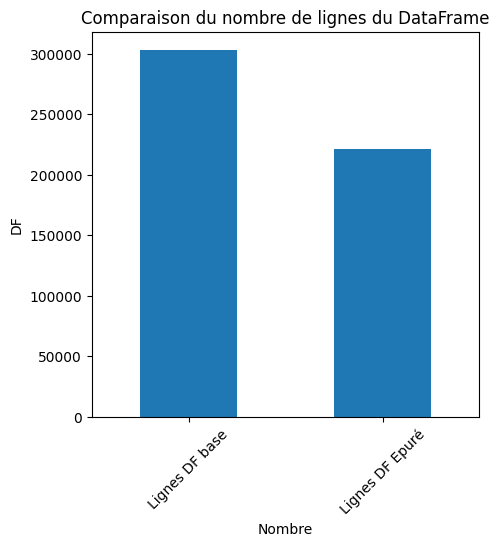

In [47]:
data_test_row = pd.DataFrame({
    'Dimensions': ['Lignes DF base', 'Lignes DF Epuré'],
    'Valeurs': [rows_init, rows]
})
data_test_row.plot.bar(x='Dimensions', y='Valeurs', figsize=(5, 5), legend=False)
plt.title('Comparaison du nombre de lignes du DataFrame')
plt.ylabel('DF')
plt.xlabel('Nombre')
plt.xticks(rotation=45)
plt.show()

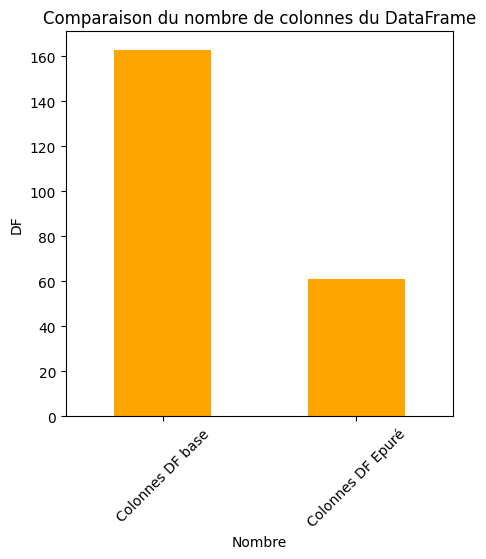

In [48]:
data_test_row = pd.DataFrame({
    'Dimensions': ['Colonnes DF base', 'Colonnes DF Epuré'],
    'Valeurs': [columns_init, columns]
})
data_test_row.plot.bar(x='Dimensions', y='Valeurs', figsize=(5, 5), legend=False, color='orange')
plt.title('Comparaison du nombre de colonnes du DataFrame')
plt.ylabel('DF')
plt.xlabel('Nombre')
plt.xticks(rotation=45)
plt.show()

### DF Actuel

In [49]:
data_exo

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,proteins_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,taurine_100g,ph_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,date_only
249418,3700019510497,http://world-fr.openfoodfacts.org/produit/3700...,malikele,1332326417,2012-03-21T10:40:17Z,1332368132,2012-03-21,Attiéké,Couscous de manioc,500 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-21
202495,3229820781136,http://world-fr.openfoodfacts.org/produit/3229...,stephane,1333872532,2012-04-08T08:08:52Z,1333872755,2012-04-08,Poudre cristallisée à base de bouleau - Xylitol,NaN,200 g,...,0.5,NaN,NaN,0.0127,0.005000,NaN,NaN,2.0,2.0,2012-04-08
252400,3760063335965,http://world-fr.openfoodfacts.org/produit/3760...,malikele,1334091151,2012-04-10T20:52:31Z,1334091465,2012-04-10,Sumac,Sumac,60 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-04-10
281470,56094381,http://world-fr.openfoodfacts.org/produit/5609...,malikele,1334348277,2012-04-13T20:17:57Z,1334348753,2012-04-13,Indian tonic,Tonic,33 cl,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-04-13
112589,01922305,http://world-fr.openfoodfacts.org/produit/0192...,malikele,1334695616,2012-04-17T20:46:56Z,1334696008,2012-04-17,"Bonbons durs, cerise sauvage",Bonbons,32 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-04-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,3270160840656,http://world-fr.openfoodfacts.org/produit/3270...,boism,1492552314,2017-04-18T21:51:54Z,1492711871,2017-04-20,Pure Sélection Sorbet Le Cassis,Sorbet plein fruit cassis,"500 ml, 380 g",...,0.3,NaN,NaN,0.0100,0.003937,NaN,NaN,5.0,5.0,2017-04-20
230691,3396410047559,http://world-fr.openfoodfacts.org/produit/3396...,kiliweb,1485783079,2017-01-30T13:31:19Z,1492736021,2017-04-21,Chocolat Noir Costa Rica 75% De Cacao,NaN,70 g,...,10.0,NaN,NaN,0.0300,0.011811,NaN,NaN,22.0,22.0,2017-04-21
258724,4008102000054,http://world-fr.openfoodfacts.org/produit/4008...,openfoodfacts-contributors,1428759162,2015-04-11T13:32:42Z,1492734933,2017-04-21,Edulcorant Liquide,Edulcorant de table à base de cyclamate de sod...,200 ml,...,0.0,NaN,NaN,1.3500,0.531496,NaN,NaN,5.0,5.0,2017-04-21
197554,3175681852020,http://world-fr.openfoodfacts.org/produit/3175...,openfoodfacts-contributors,1492732754,2017-04-20T23:59:14Z,1492733042,2017-04-21,Gerlinéa Repas Minceur Complet,NaN,4 repas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-21


### Les Catégories

#### Nombre

In [50]:
category = data_exo['categories'].value_counts()
duplicated_categories = category[category>1]
duplicated_categories

categories
Snacks sucrés,Biscuits et gâteaux,Biscuits                                                                                                                          274
Biscuits                                                                                                                                                            257
Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat                                                                                                     226
Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit-déjeuner    197
Bonbons                                                                                                                                                             192
                                                                                                                                                     

In [51]:
category = data_exo['categories_fr'].value_counts()
duplicated_categories = category[category>1]
duplicated_categories

categories_fr
Snacks sucrés,Biscuits et gâteaux,Biscuits                                                                                                                                                                                                                                                            724
Snacks sucrés,Chocolats,Chocolats noirs                                                                                                                                                                                                                                                               522
Snacks sucrés,Confiseries,Bonbons                                                                                                                                                                                                                                                                     470
Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales

In [52]:
categories_null = data_exo[data_exo['categories'].isnull() & data_exo['categories_fr'].isnull()]
categories_null

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,proteins_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,taurine_100g,ph_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,date_only
313782,8711100041252,http://world-fr.openfoodfacts.org/produit/8711...,openfoodfacts-contributors,1348254373,2012-09-21T19:06:13Z,1348305375,2012-09-22,Aromat,"Condiment en poudre, sachet de recharge",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-09-22
308204,8413725004031,http://world-fr.openfoodfacts.org/produit/8413...,openfoodfacts-contributors,1350112244,2012-10-13T07:10:44Z,1350332753,2012-10-15,"San Andrés, Jouron Impérial Dur aux cacahuètes",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-15
193796,3102870000702,http://world-fr.openfoodfacts.org/produit/3102...,mlleaca,1352988167,2012-11-15T14:02:47Z,1353003538,2012-11-15,Arôme fraise,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-11-15
175330,2000000001013,http://world-fr.openfoodfacts.org/produit/2000...,manu1400,1354723532,2012-12-05T16:05:32Z,1354723662,2012-12-05,Nestlé NIDO,NaN,402g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-12-05
228406,3364692040483,http://world-fr.openfoodfacts.org/produit/3364...,clemence,1353436055,2012-11-20T18:27:35Z,1358504695,2013-01-18,Ciboule (Phaak Boa Sot),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253909,3760136681821,http://world-fr.openfoodfacts.org/produit/3760...,kiliweb,1484396048,2017-01-14T12:14:08Z,1492710620,2017-04-20,Quinoa aux légumes verts,NaN,NaN,...,3.1,NaN,NaN,0.90000,0.354331,NaN,NaN,4.0,4.0,2017-04-20
307970,8412276951986,http://world-fr.openfoodfacts.org/produit/8412...,kiliweb,1476646805,2016-10-16T19:40:05Z,1492710659,2017-04-20,Courgettes Bio,NaN,NaN,...,1.2,NaN,NaN,0.02032,0.008000,NaN,NaN,-1.0,-1.0,2017-04-20
260845,4018722301806,http://world-fr.openfoodfacts.org/produit/4018...,kiliweb,1485710406,2017-01-29T17:20:06Z,1492710627,2017-04-20,Conchiglioni Blanc,NaN,NaN,...,12.0,NaN,NaN,0.02000,0.007874,NaN,NaN,-4.0,-4.0,2017-04-20
197554,3175681852020,http://world-fr.openfoodfacts.org/produit/3175...,openfoodfacts-contributors,1492732754,2017-04-20T23:59:14Z,1492733042,2017-04-21,Gerlinéa Repas Minceur Complet,NaN,4 repas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-21


In [53]:
number_categories = data_exo[data_exo['categories'].notna() & data_exo['categories_fr'].notna()]
number_categories

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,proteins_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,taurine_100g,ph_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,date_only
249418,3700019510497,http://world-fr.openfoodfacts.org/produit/3700...,malikele,1332326417,2012-03-21T10:40:17Z,1332368132,2012-03-21,Attiéké,Couscous de manioc,500 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-21
202495,3229820781136,http://world-fr.openfoodfacts.org/produit/3229...,stephane,1333872532,2012-04-08T08:08:52Z,1333872755,2012-04-08,Poudre cristallisée à base de bouleau - Xylitol,NaN,200 g,...,0.5,NaN,NaN,0.0127,0.005000,NaN,NaN,2.0,2.0,2012-04-08
252400,3760063335965,http://world-fr.openfoodfacts.org/produit/3760...,malikele,1334091151,2012-04-10T20:52:31Z,1334091465,2012-04-10,Sumac,Sumac,60 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-04-10
281470,56094381,http://world-fr.openfoodfacts.org/produit/5609...,malikele,1334348277,2012-04-13T20:17:57Z,1334348753,2012-04-13,Indian tonic,Tonic,33 cl,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-04-13
112589,01922305,http://world-fr.openfoodfacts.org/produit/0192...,malikele,1334695616,2012-04-17T20:46:56Z,1334696008,2012-04-17,"Bonbons durs, cerise sauvage",Bonbons,32 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-04-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197878,3178048240423,http://world-fr.openfoodfacts.org/produit/3178...,openfoodfacts-contributors,1492597693,2017-04-19T10:28:13Z,1492676989,2017-04-20,teraxil,NaN,75ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-20
202419,3229820181363,http://world-fr.openfoodfacts.org/produit/3229...,openfoodfacts-contributors,1368812882,2013-05-17T17:48:02Z,1492714891,2017-04-20,"Ramen, Nouilles japonaises précuites, assaison...",Nouilles japonaises,360 g,...,6.3,NaN,NaN,1.7000,0.669291,NaN,NaN,4.0,4.0,2017-04-20
219572,3270160840656,http://world-fr.openfoodfacts.org/produit/3270...,boism,1492552314,2017-04-18T21:51:54Z,1492711871,2017-04-20,Pure Sélection Sorbet Le Cassis,Sorbet plein fruit cassis,"500 ml, 380 g",...,0.3,NaN,NaN,0.0100,0.003937,NaN,NaN,5.0,5.0,2017-04-20
230691,3396410047559,http://world-fr.openfoodfacts.org/produit/3396...,kiliweb,1485783079,2017-01-30T13:31:19Z,1492736021,2017-04-21,Chocolat Noir Costa Rica 75% De Cacao,NaN,70 g,...,10.0,NaN,NaN,0.0300,0.011811,NaN,NaN,22.0,22.0,2017-04-21


#### Visulation du nombre de catégories

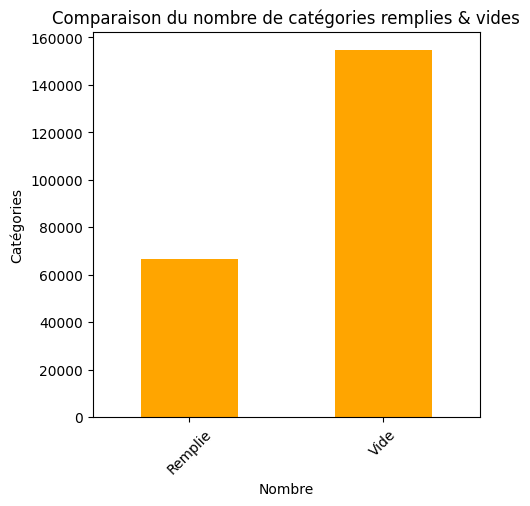

In [54]:
numbers_categories_null = categories_null.shape[0]
real_number_categories = number_categories.shape[0]
data_categories = pd.DataFrame({
    'Categories': ['Remplie', 'Vide'],
    'Valeurs': [real_number_categories, numbers_categories_null]
})
data_categories.plot.bar(x='Categories', y='Valeurs', figsize=(5, 5), legend=False, color='orange')
plt.title('Comparaison du nombre de catégories remplies & vides')
plt.ylabel('Catégories')
plt.xlabel('Nombre')
plt.xticks(rotation=45)
plt.show()

### Données sur un produit

In [60]:
data = data_exo[data_exo['product_name'] == 'Ice Cream']

# Convertir le dictionnaire en DataFrame pour un affichage plus lisible
data_df = pd.DataFrame(data)

data_df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,proteins_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,taurine_100g,ph_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,date_only
269736,5000159491150,http://world-fr.openfoodfacts.org/produit/5000...,tacite,1460065720,2016-04-07T21:48:40Z,1472373545,2016-08-28,Ice Cream,"Crème glacée à la noix de coco, enrobage cacao...",391 g (501 ml),...,3.1,NaN,NaN,0.11,0.043307,NaN,NaN,18.0,18.0,2016-08-28


In [61]:
stat_data_df = pd.DataFrame(data_df)
# Ne garder que les colonnes numériques
numerical_data = stat_data_df.select_dtypes(include=['float64', 'int64'])

# Calculer les statistiques sur les colonnes numériques
statistics = {
    'min': numerical_data.min(),
    'max': numerical_data.max(),
    'mean': numerical_data.mean(),
    'median': numerical_data.median()
}
statistics_df = pd.DataFrame(statistics)
statistics_df

,min,max,mean,median
additives_n,6.000000,6.000000,6.000000,6.000000
ingredients_from_palm_oil_n,1.000000,1.000000,1.000000,1.000000
ingredients_from_palm_oil,NaN,NaN,NaN,NaN
ingredients_that_may_be_from_palm_oil_n,1.000000,1.000000,1.000000,1.000000
nutrition_grade_uk,NaN,NaN,NaN,NaN
energy_100g,1119.000000,1119.000000,1119.000000,1119.000000
energy-from-fat_100g,NaN,NaN,NaN,NaN
fat_100g,16.000000,16.000000,16.000000,16.000000
saturated-fat_100g,11.500000,11.500000,11.500000,11.500000
butyric-acid_100g,NaN,NaN,NaN,NaN


In [63]:
columns = data_exo.columns
list_columns = columns.tolist()
list_columns

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'labels',
 'cities',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens_fr',
 'serving_size',
 'additives_n',
 'additives',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_uk',
 'nutrition_grade_fr',
 'states',
 'states_tags',
 'states_fr',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'lignoceric-acid_100g',
 'melissic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-acid_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_1

In [64]:
# Sélectionner les colonnes qui ne doivent jamais être vide
column_to_check = ['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']
# Verification que ces colonnes ne sont pas vides
columns = data_exo[column_to_check].notna().all(axis=1)
columns

249418    False
202495     True
252400    False
281470    False
112589    False
          ...  
219572     True
230691     True
258724     True
197554    False
255005     True
Length: 221344, dtype: bool